# **Final Project - Group 3**
## **"Self-Driving Car"**
Implementing end to end learning for self-driving cars using simulator based on Nvidia Paper

In [1]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzip data from drive

!unzip drive/MyDrive/Classroom/Brainster/data.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/IMG/right_2018_06_07_16_26_51_233.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_303.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_373.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_448.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_515.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_597.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_699.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_775.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_844.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_910.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_51_981.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_52_053.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_52_124.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_52_194.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_52_297.jpg  
  inflating: data/IMG/right_2018_06_07_16_26_52_366.jpg  
  inflating: data/IMG

# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import os
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import random
from sklearn.utils import shuffle
import tensorflow as tf
from random import shuffle
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import core, convolutional, pooling
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers, backend

# **Dataset loading, reading and preprocessing**

### Dataset load

In [28]:
#Dataset read

dataset = pd.read_csv('data/driving_log.csv', names= ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])
print(dataset['center'][1])

C:\Users\Kiko-PC\Desktop\data\IMG\center_2018_06_07_05_29_49_394.jpg


In [5]:
#Extracting the image name path

copy_dataset = dataset.copy()

copy_dataset['center'] = copy_dataset['center'].apply(lambda x : x.split('\\')[6])
copy_dataset['left'] = copy_dataset['left'].apply(lambda x : x.split('\\')[6])
copy_dataset['right'] = copy_dataset['right'].apply(lambda x : x.split('\\')[6])

In [6]:
copy_dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_06_07_05_29_49_325.jpg,left_2018_06_07_05_29_49_325.jpg,right_2018_06_07_05_29_49_325.jpg,0.00,0.794864,0.0,19.92038
1,center_2018_06_07_05_29_49_394.jpg,left_2018_06_07_05_29_49_394.jpg,right_2018_06_07_05_29_49_394.jpg,-0.20,1.000000,0.0,20.64024
2,center_2018_06_07_05_29_49_461.jpg,left_2018_06_07_05_29_49_461.jpg,right_2018_06_07_05_29_49_461.jpg,-0.35,1.000000,0.0,21.21182
3,center_2018_06_07_05_29_49_548.jpg,left_2018_06_07_05_29_49_548.jpg,right_2018_06_07_05_29_49_548.jpg,0.00,1.000000,0.0,21.97414
4,center_2018_06_07_05_29_49_621.jpg,left_2018_06_07_05_29_49_621.jpg,right_2018_06_07_05_29_49_621.jpg,0.00,1.000000,0.0,22.76049


## Dataset read

In [9]:
#Definition of read_image function

def read_image(path_):
  """
  Reads image path and returns image in RGB format
  """
  final_path = os.path.join("data/IMG", path_)
  picture = cv.imread(final_path)
  picture_rgb = cv.cvtColor(picture, cv.COLOR_BGR2RGB)
  return picture_rgb

#Define inputs(image) and targets(angle) datasets and implementing read_image function

inputs = []
targets = []
for c1, c2, c3, angle in zip(copy_dataset['center'], copy_dataset['left'], copy_dataset['right'], copy_dataset['steering']):
   inputs.append(c1)
   targets.append(angle)
   inputs.append(c2)
   targets.append(angle-0.2)
   inputs.append(c3)
   targets.append(angle+0.2)

print(len(inputs))
print(len(targets))

47232
47232


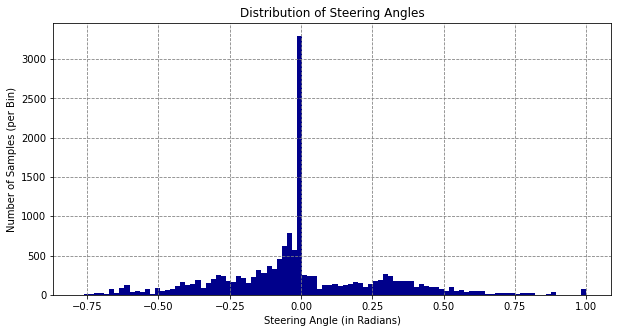

In [7]:
# Basic plotting of the dataset:
plt.figure(figsize = (10, 5))
plt.hist(dataset['steering'], bins = 100, color = 'darkblue')
plt.grid(color = 'grey', linestyle = '--')
plt.title('Distribution of Steering Angles')
plt.xlabel('Steering Angle (in Radians)')
plt.ylabel('Number of Samples (per Bin)')
plt.show()

Training Samples: 37785
Test Samples: 9447


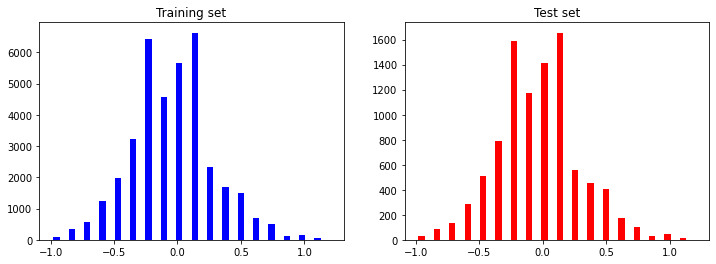

In [10]:
#Dataset split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.20, random_state = 1)

# Check that data is valid
print("Training Samples: {}\nTest Samples: {}".format(len(X_train), len(X_test)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=18, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_test, bins=18, width=0.05, color='red')
axes[1].set_title('Test set');

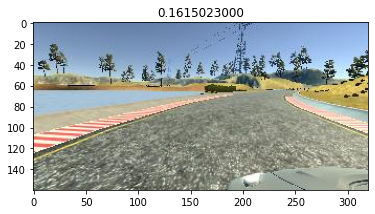

In [ ]:
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
plt.show()

## Dataset preprocessing

In [11]:
#Definition of crop function

def crop(img, crop_size=50):
    """
    Crop the image (removing the sky)
    """
    new_slika = img.copy()
    cropped = new_slika[crop_size:-20, :, :]

    return cropped

In [ ]:
# #Definition of resize function

# image_width = 200
# image_height = 66

# def resize_image(image):
#     """
#     Resize the image to the input shape used by the network model
#     """
#     resized_image = cv.resize(image, (image_width, image_height), cv.INTER_AREA)
    
#     return resized_image


In [12]:
#YUV color transformation function

def yuv_color(image):
  """ 
  Change to YUV image
  """
  yuv_image = cv.cvtColor(image, cv.COLOR_RGB2YUV)

  return yuv_image

In [13]:
#Normalize data 

def normalize(image):
  image = image.astype(np.float32)
  return image/255.0

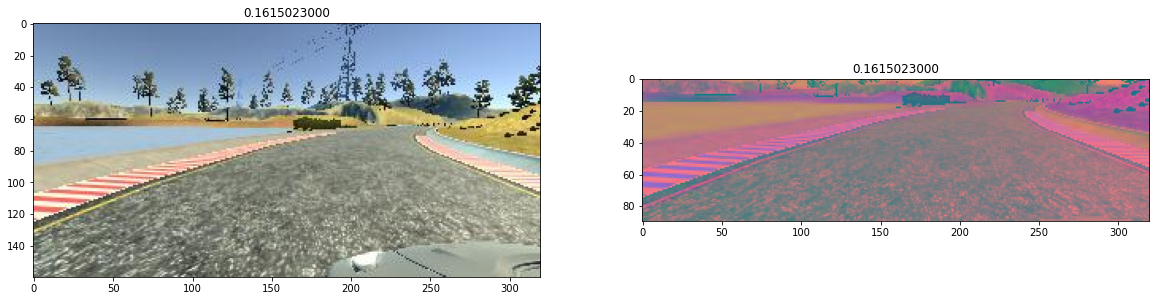

In [ ]:
#Comparison of the original and the cropped image

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
plt.imshow(yuv_color(crop(read_image(X_train[10]))))
plt.title('{0:.10f}'.format(y_train[10]))
plt.show(block=True)

# **Defining Image Augmentation Functions**



In [14]:
#Image flip function

def flip_image(img, steering_angle):
    """
    Flip the image and adjust the steering angle.
    """
    flip_img = cv.flip(img, 1)
    steering_angle = steering_angle * (-1)
    
    return flip_img, steering_angle

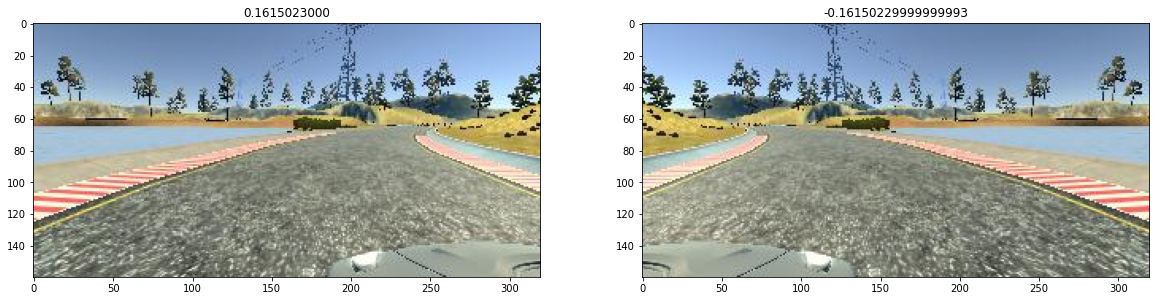

In [15]:
#Comparison of the original and the flipped image

original_image = read_image(X_train[10])
original_angle = y_train[10]

fliped_image, fliped_angle = flip_image(original_image, original_angle)

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
plt.imshow(fliped_image)
plt.title(fliped_angle)

plt.show(block=True)

In [16]:
#Changing brigthness of image

def change_image_brightness(img, s_low=0.5, s_high=0.99):
    """
    Adjust brightness of the image.
    """
    img = img.astype(np.float32)
    s = np.random.uniform(s_low, s_high)
    img[:,:,:] *= s
    np.clip(img, 0, 255)
    return  img.astype(np.uint8)

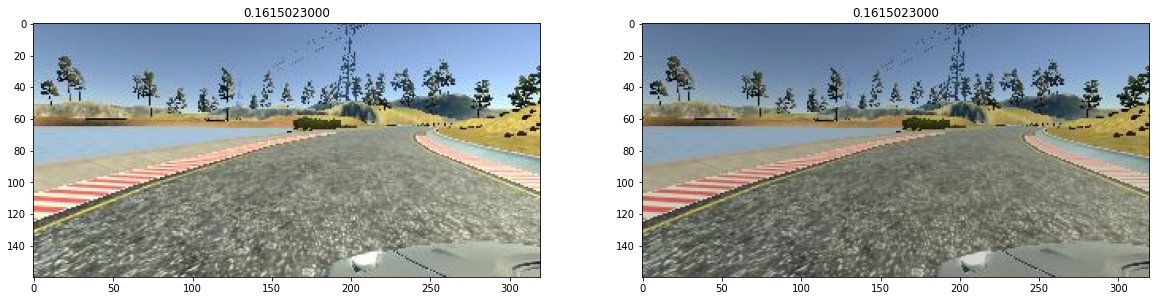

In [17]:
#Comparison of the original and image with changed brigthness

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
plt.imshow(change_image_brightness(read_image(X_train[10])))
plt.title('{0:.10f}'.format(y_train[10]))
plt.show(block=True)

In [123]:
#Adding random shadow

def add_random_shadow(img, w_low=0.4, w_high=0.6):
    """
    Generates and adds random shadow.
    """
    cols, rows = (img.shape[0], img.shape[1])
    
    top_y = np.random.random_sample() * rows
    bottom_y = np.random.random_sample() * rows
    bottom_y_right = bottom_y + np.random.random_sample() * (rows - bottom_y)
    top_y_right = top_y + np.random.random_sample() * (rows - top_y)
    if np.random.random_sample() <= 0.5:
        bottom_y_right = bottom_y - np.random.random_sample() * (bottom_y)
        top_y_right = top_y - np.random.random_sample() * (top_y)
    
    poly = np.asarray([[ [top_y,0], [bottom_y, cols], [bottom_y_right, cols], [top_y_right,0]]], dtype=np.int32)
        
    mask_weight = np.random.uniform(w_low, w_high)
    origin_weight = 1 - mask_weight
    
    mask = np.copy(img).astype(np.int32)
    cv.fillPoly(mask, poly, (0, 0, 0))
    
    return cv.addWeighted(img.astype(np.int32), origin_weight, mask, mask_weight, 0).astype(np.uint8)

In [84]:
import cv2
def add_random_shadow_(image):
    print('shadow')
    """
    Generates and adds random shadow
    """
    IMAGE_HEIGHT, IMAGE_WIDTH = image.shape[0:2]
    rand_width_scal_1 =  np.random.rand()
    x1, y1 = IMAGE_WIDTH *  rand_width_scal_1, 0
    rand_width_scal_2 =  np.random.rand()
    x2, y2 = IMAGE_WIDTH * rand_width_scal_2, IMAGE_HEIGHT
    xn, yn = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]
    mask = np.zeros_like(image[:, :, 1])
    mask[(yn - y1) * (x2 - x1) - (y2 - y1) * (xn - x1) > 0] = 1
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)
    
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

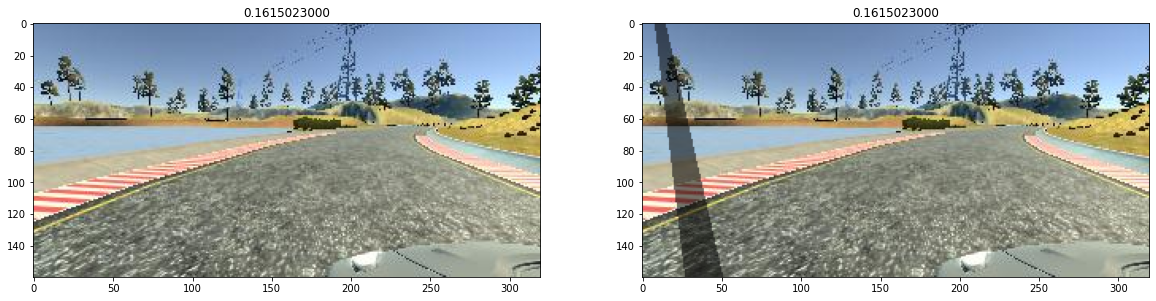

In [126]:
#Comparison of the original and image with added random shadow

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
plt.imshow(add_random_shadow(read_image(X_train[10])))
plt.title('{0:.10f}'.format(y_train[10]))
plt.show(block=True)

In [86]:
#Adding random noise

def random_noise(image,prob=0.01):
    """
    Adds random noise to teh image.
    """
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

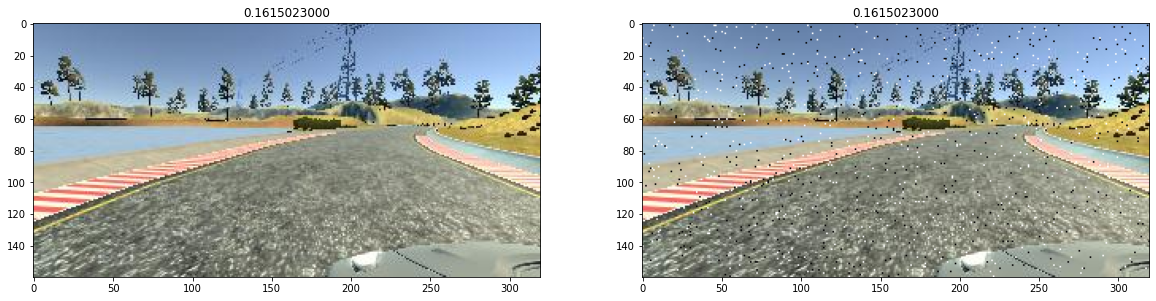

In [87]:
#Comparison of the original and image with added random noise

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
plt.imshow(random_noise(read_image(X_train[10])))
plt.title('{0:.10f}'.format(y_train[10]))
plt.show(block=True)

# **Generator**

In [137]:
def augment_image(img, angle, p=1.0):
    """
    Randomly implements augmention function on image.
    """
    aug_img = img
    
    if np.random.random_sample() <= p: 
        aug_img, angle = flip_image(aug_img, angle)
     
    if np.random.random_sample() <= p:
        aug_img = change_image_brightness(aug_img)
    
    if np.random.random_sample() <= p: 
        aug_img = add_random_shadow(aug_img)

    if np.random.random_sample() <= p:
        aug_img = random_noise(aug_img)
            
    return aug_img, angle

In [ ]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[10]))
plt.title('{0:.10f}'.format(y_train[10]))
f.add_subplot(1,2, 2)
slika, agol = augment_image(yuv_color(read_image(X_train[10])),y_train[10])
plt.imshow(slika)
plt.title('{0:.10f}'.format(y_train[10]))
plt.show(block=True)

In [23]:
# def generator(inputs, targets, batch_size = 32, is_training=True):
#     """
#     Creating 'generator' function for memory efficiency.
#     This function shuffles the dataset, crops images, randomly implements image agmentation function only on training dataset and normalize the images.
#     """
#     images = inputs
#     while True:
#       images, targets = sklearn.utils.shuffle(images, targets)
#       for i in range(0, len(images), batch_size):
#           X_batch = []
#           target_batch  = []
#           for image, target in zip(images[i:i+batch_size], targets[i:i+batch_size]):
#               #Read, crop, resize and yuv color 
#               slika = read_image(image)
#               slika = crop(slika)
#               #slika = resize_image(slika)
#               if is_training:
#                 slika_yuv = yuv_color(slika)
#                 X_batch.append(normalize(slika_yuv))
#                 target_batch.append(target)
#                 slika_flipped, angle = flip_image(slika, target)
#                 fliped_image = normalize(slika_flipped)
#                 X_batch.append(fliped_image)
#                 target_batch.append(angle)
#                 augmented_image, angle = augment_image(slika, target, p=0.5)
#                 slika = normalize(augmented_image)
#                 X_batch.append(slika)
#                 target_batch.append(angle)
#               else:
#                 X_batch.append(normalize(slika))
#                 target_batch.append(target)

#           yield np.array(X_batch), np.array(target_batch)

In [142]:
def generator(inputs, targets, batch_size = 32, is_training=True):
    """
    Creating 'generator' function for memory efficiency.
    This function shuffles the dataset, crops images, randomly implements image agmentation function only on training dataset and normalize the images.
    """
    images = inputs
    while True:
      images, targets = sklearn.utils.shuffle(images, targets)
      for i in range(0, len(images), batch_size):
          X_batch = []
          target_batch  = []
          for image, target in zip(images[i:i+batch_size], targets[i:i+batch_size]):
              #Read, crop, resize and yuv color 
              slika = read_image(image)
              slika = crop(slika)
              #slika = resize_image(slika)
              slika_yuv = yuv_color(slika)
              X_batch.append(normalize(slika_yuv))
              target_batch.append(target)
              slika_flipped, angle = flip_image(slika, target)
              fliped_image = normalize(slika_flipped)
              X_batch.append(fliped_image)
              target_batch.append(angle)
              if is_training:
                augmented_image, angle = augment_image(slika_yuv, target, p=0.5)
                slika = normalize(augmented_image)
                X_batch.append(slika)
                target_batch.append(angle)
          yield np.array(X_batch), np.array(target_batch)

In [143]:
train_generator = generator(X_train, y_train, 32)
valid_generator = generator(X_test, y_test, 32, is_training=False)

In [120]:
# for element in train_generator:
#   image, angle = element
#   print(image.shape)
#   print(np.mean(image[2, :,:,2]))
#   print(np.mean(image[0, :,:,2]))
#   print(np.mean(image[1, :,:,2]))

#   #plt.imshow(image[2, ...])
#   #plt.show()

(96, 90, 320, 3)
0.46700302
0.5081206
0.49424392
(96, 90, 320, 3)
0.47508797
0.5043472
0.4764303
(96, 90, 320, 3)
0.27472514
0.50517267
0.5177372
(96, 90, 320, 3)
0.5236981
0.5236981
0.4602794
(96, 90, 320, 3)
0.3827673
0.50195163
0.44357723
(96, 90, 320, 3)
0.50044304
0.5008217
0.44542402
(96, 90, 320, 3)
0.35306987
0.5073762
0.47179458


KeyboardInterrupt: ignored

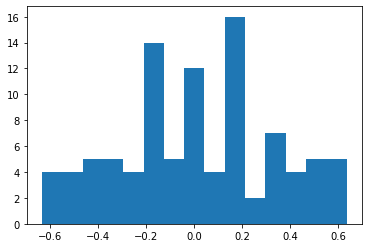

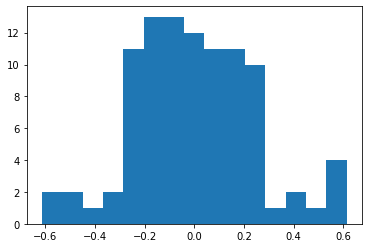

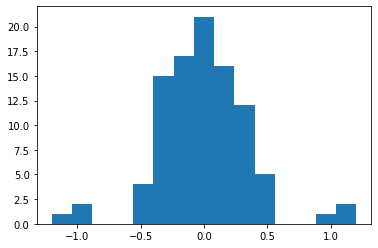

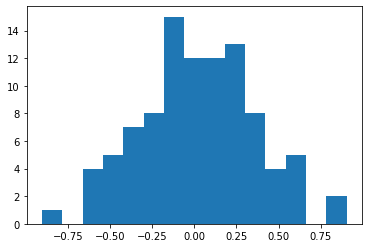

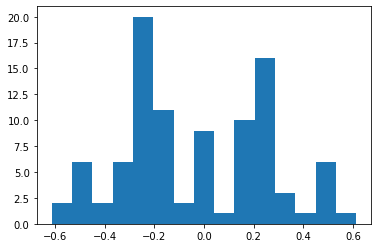

In [ ]:
#Visualzation of target per batch

for i in range(5):
   _, angle = next(train_generator)
   plt.hist(angle, bins = 15)
   plt.show()

# **Building Neural Networks**

##Model 1 architecture, compile, summary

In [ ]:
model1 = Sequential()

# Input normalization layer
model1.add(Convolution2D(16, (3, 3), strides = (2, 2), input_shape=(90,320, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Convolution2D(32, 3, 3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Convolution2D(128, 2, 2, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(core.Flatten())

model1.add(core.Dense(100, activation='relu'))
model1.add(core.Dropout(.5))

model1.add(core.Dense(64, activation='relu'))
model1.add(core.Dropout(.25))

model1.add(core.Dense(10, activation='relu'))

model1.add(core.Dense(1))

#model compile
model1.compile(optimizer=optimizers.Adam(learning_rate=1e-04), loss='mse')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 44, 159, 16)       448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 80, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 26, 32)         4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 13, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 6, 128)         16512     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)              

###Model checkpoint and early stopping

In [ ]:
filepath = "saved-model-{epoch:02d}.h5"

callback1 = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=False, mode='min', verbose=1)
callback2 = EarlyStopping(patience=5)
callback_list = [callback1, callback2]

###Model training

In [ ]:
history1 = model1.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list,
        epochs=20)

Epoch 1/20
1037/1037 [==============================] - 546s 509ms/step - loss: 0.0373 - val_loss: 0.0364

Epoch 00001: saving model to saved-model-01.h5
Epoch 2/20
1037/1037 [==============================] - 521s 502ms/step - loss: 0.0344 - val_loss: 0.0301

Epoch 00002: saving model to saved-model-02.h5
Epoch 3/20
1037/1037 [==============================] - 527s 509ms/step - loss: 0.0298 - val_loss: 0.0276

Epoch 00003: saving model to saved-model-03.h5
Epoch 4/20
1037/1037 [==============================] - 525s 507ms/step - loss: 0.0268 - val_loss: 0.0251

Epoch 00004: saving model to saved-model-04.h5
Epoch 5/20
1037/1037 [==============================] - 522s 504ms/step - loss: 0.0251 - val_loss: 0.0235

Epoch 00005: saving model to saved-model-05.h5
Epoch 6/20
1037/1037 [==============================] - 512s 494ms/step - loss: 0.0244 - val_loss: 0.0236

Epoch 00006: saving model to saved-model-06.h5
Epoch 7/20
1037/1037 [==============================] - 510s 492ms/step - lo

###Model resaults visualization

Text(0.5, 0, 'Epoch')

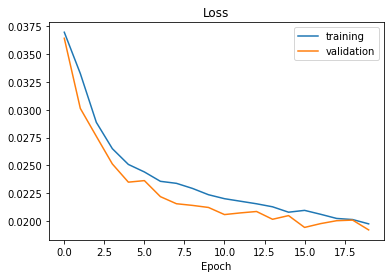

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

###Model save

In [ ]:
model1.save('model1.h5')

##Model 2 architecture, compile, summary

In [ ]:
model2 = Sequential()
# Input normalization layer
model2.add(Convolution2D(24, 2, 2, input_shape=(image_height, image_width, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Convolution2D(36, 2, 2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Convolution2D(48, 2, 2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Convolution2D(64, 2, 2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Dropout(0.5))

model2.add(Convolution2D(128, 2, 2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Dropout(0.5))

model2.add(core.Flatten())
model2.add(core.Dense(100, activation='relu'))
model2.add(core.Dropout(0.25))

model2.add(core.Dense(50, activation='relu'))
model2.add(core.Dropout(0.25))

model2.add(core.Dense(10, activation='relu'))

model2.add(core.Dense(1))

#model compile
model2.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss='mse')

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 33, 100, 24)       312       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 50, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 25, 36)         3492      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 13, 36)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 2, 6, 48)          6960      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 3, 48)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 3, 64)         

###Model checkpoint and early stopping

In [ ]:
callback12 = ModelCheckpoint('best_model2.pt', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
callback22 = EarlyStopping(patience=5)
callback_list_2 = [callback12, callback22]

###Model training

In [ ]:
history_2 = model2.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_2,
        epochs=30)

###Model resaults visualization

Text(0.5, 0, 'Epoch')

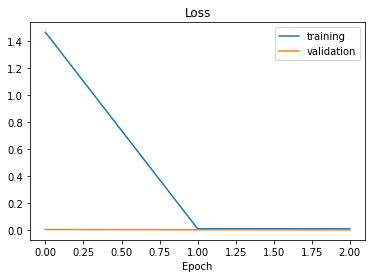

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

###Model save

In [ ]:
model2.save('model2.h5')

##Model 3 architecture, compile, summary

In [ ]:
model3 = Sequential()
model3.add(Convolution2D (32, (3, 3), strides =(2, 2), input_shape=(image_height, image_width, 3), padding ='same', activation='elu'))
model3.add(MaxPooling2D(pool_size =(2,2)))

model3.add(Convolution2D (64, (3, 3), strides =(2,2), padding ='same', activation='elu'))
model3.add(MaxPooling2D(pool_size =(2,2)))

model3.add(Convolution2D (128, (3, 3), strides =(2,2), padding ='same', activation='elu'))
model3.add(MaxPooling2D(pool_size =(2,2)))

model3.add(Convolution2D (256, (3, 3), strides =(2,2), padding ='same', activation='elu'))
model3.add(MaxPooling2D(pool_size =(1,1)))

model3.add(Convolution2D (512, (3, 3), strides =(2,2), padding ='same', activation='elu'))
model3.add(MaxPooling2D(pool_size =(1,1)))
model3.add(Dropout(0.5))

model3.add(Flatten())

model3.add(Dense(1024, activation ='elu'))
model3.add(Dropout(0.5))

model3.add(Dense(256, activation ='elu'))
model3.add(Dropout(0.5))

model3.add(Dense(1))

model3.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='mse')

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 33, 100, 32)       896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 25, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 12, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 3, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 2, 256)        

###Model checkpoint and early stopping

In [ ]:
callback13 = ModelCheckpoint('best_model_3.pt', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
callback23 = EarlyStopping(patience=5)
callback_list_3 = [callback13, callback23]

###Model training

In [ ]:
history_3 = model3.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_3,
        epochs=20)

NameError: ignored

In [ ]:
model3.save('model3_marija.h5')

###Model resaults visualization

Text(0.5, 0, 'Epoch')

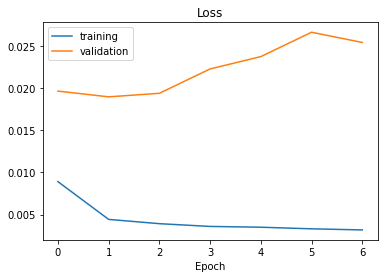

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

###Model save

In [ ]:
model3.save('model3.h5')

##Model 4 architecture, compile and summary

In [ ]:
model4 = Sequential()
model4.add(Convolution2D(24, 5, 5, input_shape = (100,320,3), activation='relu'))
model4.add(BatchNormalization())

model4.add(Convolution2D(36, 5, 5, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Convolution2D(64, 2, 2, activation='relu'))
model4.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Convolution2D(128, 1, 1, activation='relu'))
model4.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Convolution2D(256, 1, 1, activation='relu'))
model4.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Convolution2D(512, 1, 1, activation='relu'))
model4.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
    
model4.add(Flatten())

model4.add(Dense(250, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(50, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(1))
    
model4.compile(loss = "MSE", optimizer = Adam(learning_rate = 0.001))

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 20, 64, 24)        1824      
_________________________________________________________________
batch_normalization_9 (Batch (None, 20, 64, 24)        96        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 12, 36)         21636     
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 12, 36)         144       
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 12, 36)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 3, 64)         

In [ ]:
callback14 = ModelCheckpoint('best_model_4.pt', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
callback24 = EarlyStopping(patience=7)
callback_list_4 = [callback14, callback24]

In [ ]:
history_4 = model4.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_4,
        epochs=20)

Epoch 1/20
650/650 [==============================] - 574s 873ms/step - loss: 0.3791 - val_loss: 0.0541

Epoch 00001: val_loss improved from inf to 0.05408, saving model to best_model_4.pt
INFO:tensorflow:Assets written to: best_model_4.pt/assets
Epoch 2/20
650/650 [==============================] - 562s 866ms/step - loss: 0.0404 - val_loss: 0.0366

Epoch 00002: val_loss improved from 0.05408 to 0.03658, saving model to best_model_4.pt
INFO:tensorflow:Assets written to: best_model_4.pt/assets
Epoch 3/20
650/650 [==============================] - 563s 867ms/step - loss: 0.0370 - val_loss: 0.0344

Epoch 00003: val_loss improved from 0.03658 to 0.03445, saving model to best_model_4.pt
INFO:tensorflow:Assets written to: best_model_4.pt/assets
Epoch 4/20
650/650 [==============================] - 567s 873ms/step - loss: 0.0364 - val_loss: 0.0479

Epoch 00004: val_loss did not improve from 0.03445
Epoch 5/20
650/650 [==============================] - 564s 868ms/step - loss: 0.0356 - val_loss

Text(0.5, 0, 'Epoch')

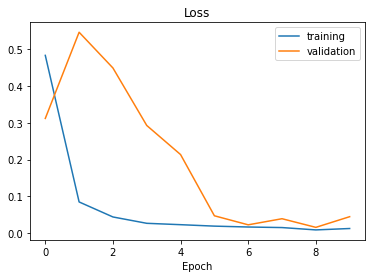

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model4.save('model4.h5')

##Model 

In [144]:
model5 = Sequential()
# Input normalization layer
model5.add(Convolution2D(24, (5, 5), strides = (2, 2), input_shape = (90, 320, 3), activation = 'elu'))

# 5x5 Convolutional layers with stride of 2x2
model5.add(Convolution2D(24, (5, 5), strides=(2, 2), activation='elu'))
model5.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
model5.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))

# 3x3 Convolutional layers with stride of 1x1
model5.add(Convolution2D(64, (1, 1), strides=(1, 1), activation='elu'))
model5.add(Convolution2D(128, (1, 1), strides=(1, 1), activation='elu'))

# Flatten before passing to Fully Connected layers
model5.add(Flatten())

# Three fully connected layers
model5.add(Dense(100, activation='elu'))
model5.add(Dropout(.5))
model5.add(Dense(50, activation='elu'))
model5.add(Dropout(.5))
model5.add(Dense(10, activation='elu'))
model5.add(Dropout(.5))

# Output layer with tanh activation 
model5.add(Dense(1))

adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model5.compile(optimizer="adam", loss="mse")


In [145]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 77, 24)        14424     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 37, 36)         21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 17, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 17, 64)         3136      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 17, 128)        8320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 4352)             

In [146]:
filepath = "saved-model5-{epoch:02d}.h5"

callback15 = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=False, mode='min', verbose=1)
callback25 = EarlyStopping(patience=4)
callback_list_5 = [callback15, callback25]

In [ ]:
history_5 = model5.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_5,
        epochs=20)

Epoch 1/20
1180/1180 [==============================] - 762s 645ms/step - loss: 0.4843 - val_loss: 0.0843

Epoch 00001: saving model to saved-model5-01.h5
Epoch 2/20
1180/1180 [==============================] - 752s 637ms/step - loss: 0.0978 - val_loss: 0.0744

Epoch 00002: saving model to saved-model5-02.h5
Epoch 3/20
1180/1180 [==============================] - 749s 635ms/step - loss: 0.0908 - val_loss: 0.0732

Epoch 00003: saving model to saved-model5-03.h5
Epoch 4/20
1041/1180 [=========================>....] - ETA: 1:25 - loss: 0.0859

In [ ]:
model5.save('model5-marija.h5')

In [25]:
model6 = Sequential()
model6.add(Convolution2D(32, (3, 3), activation='relu', input_shape = (90, 320, 3), padding='same'))
model6.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model6.add(Dropout(0.25))
model6.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model6.add(Dropout(0.25))
model6.add(Convolution2D(256, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='same'))
model6.add(Dropout(0.5))
model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1))
model6.compile(optimizer=Adam(learning_rate=1e-4), loss = 'mse')
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 320, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 160, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 160, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 160, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 80, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 80, 256)       1

In [26]:
filepath = "saved-model06-{epoch:02d}.h5"

callback16 = ModelCheckpoint(filepath,  monitor='val_loss', save_best_only=False, mode='min', verbose=1)
callback26 = EarlyStopping(patience=4)
callback_list_6 = [callback16, callback26]

In [27]:
history_6 = model6.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_6,
        epochs=20)

Epoch 1/20
1180/1180 [==============================] - 811s 649ms/step - loss: 0.2154 - val_loss: 0.1056

Epoch 00001: saving model to saved-model06-01.h5
Epoch 2/20
1180/1180 [==============================] - 755s 639ms/step - loss: 0.1060 - val_loss: 0.1056

Epoch 00002: saving model to saved-model06-02.h5
Epoch 3/20
1180/1180 [==============================] - 759s 644ms/step - loss: 0.1048 - val_loss: 0.1056

Epoch 00003: saving model to saved-model06-03.h5
Epoch 4/20
1180/1180 [==============================] - 762s 646ms/step - loss: 0.1048 - val_loss: 0.1056

Epoch 00004: saving model to saved-model06-04.h5
Epoch 5/20
1180/1180 [==============================] - 754s 639ms/step - loss: 0.1045 - val_loss: 0.1057

Epoch 00005: saving model to saved-model06-05.h5


In [ ]:
model6.save('model6-marija.h5')

In [ ]:
model7 = Sequential()
  
model7.add(Convolution2D(32, 3, 3, input_shape = (66, 200, 3), padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.5))

model7.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.5))

model7.add(Convolution2D(128, 3, 3, padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(1,1)))
model7.add(Dropout(0.5))
    
model7.add(Convolution2D(256, 3, 3, padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(1,1)))
model7.add(Dropout(0.5))

    
    # Flattening the output of last convolutional layer before entering fully connected phase
model7.add(Flatten())
    
    # Fully connected layers    
model7.add(Dense(1024, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

    
model7.add(Dense(128, activation='relu'))
model7.add(BatchNormalization())
    
model7.add(Dense(64, activation='relu'))
model7.add(BatchNormalization())

    
model7.add(Dense(16, activation='relu'))
model7.add(BatchNormalization())
    
    # Output layer
model7.add(Dense(1))
    
model7.compile(loss = "MSE", optimizer = Adam(lr = 0.001))
model7.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 22, 67, 32)        896       
_________________________________________________________________
batch_normalization_34 (Batc (None, 22, 67, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 11, 33, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 11, 33, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 4, 11, 64)         18496     
_________________________________________________________________
batch_normalization_35 (Batc (None, 4, 11, 64)         256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 5, 64)        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callback17 = ModelCheckpoint('best_model_7.pt', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
callback27 = EarlyStopping(patience=3)
callback_list_7 = [callback17, callback27]

In [ ]:
history_7 = model6.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data  = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list_3,
        epochs=20)

Epoch 1/20
650/650 [==============================] - 204s 315ms/step - loss: 0.0032 - val_loss: 0.0349

Epoch 00001: val_loss did not improve from 0.01894
Epoch 2/20
186/650 [=======>......................] - ETA: 2:28 - loss: 0.0032

KeyboardInterrupt: ignored

##Preparating the X_train dataset for predictions

In [ ]:
def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = read_image(image)
    image = crop(image)
    #image = resize_image(image)
    image = normalize(image)

    return image

In [ ]:
# Converting the X_test dataset for predictions

X_test_ = np.array(list(map(preprocess, X_test)))

In [ ]:
mode1_prediction = model1.predict(X_test_)
#mode2_prediction = model2.predict(X_test_)
#mode3_prediction = model3.predict(X_test_)
#mode4_prediction = model4.predict(X_test_)
#mode5_prediction = model5.predict(X_test_)

In [ ]:
mode1_prediction = mode1_prediction.reshape(1,-1)
#mode2_prediction = mode2_prediction.reshape(1,-1)
#mode3_prediction = mode3_prediction.reshape(1,-1)
#mode4_prediction = mode4_prediction.reshape(1,-1)
#mode5_prediction = mode5_prediction.reshape(1,-1)

In [ ]:
model1_pred_abs = np.abs(y_test-mode1_prediction) 
#model2_pred_abs = np.abs(y_test-mode2_prediction) 
#model3_pred_abs = np.abs(y_test-mode3_prediction) 
#model4_pred_abs = np.abs(y_test-mode4_prediction) 
#model5_pred_abs = np.abs(y_test-mode5_prediction) 

In [ ]:
threshold = 0.7

In [ ]:
is_accurate_model1 = np.where(model1_pred_abs<threshold, 1, 0)
#is_accurate_model2 = np.where(model2_pred_abs<threshold, 1, 0)
#is_accurate_model3 = np.where(model3_pred_abs<threshold, 1, 0)
#is_accurate_model4 = np.where(model4_pred_abs<threshold, 1, 0)
#is_accurate_model5 = np.where(model5_pred_abs<threshold, 1, 0)

In [ ]:
accuracy_score_model1 = np.mean(is_accurate_model1)
#accuracy_score_model2 = np.mean(is_accurate_model2)
#accuracy_score_model3 = np.mean(is_accurate_model3)
#accuracy_score_model4 = np.mean(is_accurate_model4)
#accuracy_score_model5 = np.mean(is_accurate_model5)

In [ ]:
print(accuracy_score_model1)

1.0
